

# [Введение в Data Science и машинное обучение](https://stepik.org/course/4852/syllabus)

Блокнот по курсу Введение в Data Science и машинное обучение

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os import system
get_ipython().run_line_magic('matplotlib', 'inline')
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

sns.set(rc={'figure.figsize': (9,6)})

In [ ]:
! gdown --   19p71n8QCBoOIK76pDyuYO-XztNlAW6zE

Downloading...
From: https://drive.google.com/uc?id=19p71n8QCBoOIK76pDyuYO-XztNlAW6zE
To: /content/event_data_train.zip
100% 18.9M/18.9M [00:00<00:00, 43.5MB/s]


In [ ]:
! unzip /content/event_data_train.zip

Archive:  /content/event_data_train.zip
  inflating: event_data_train.csv    


In [ ]:
events_data = pd.read_csv('/content/event_data_train.csv')

In [ ]:
# Для локальной загрузки
events_data = pd.read_csv('D:/DS/datafiles/event_data_train.zip', compression='zip')

In [ ]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [ ]:
# просмотр уникальных событий
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [ ]:
events_data['date']=pd.to_datetime(events_data.timestamp, unit='s')

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [ ]:
events_data.dtypes

,0
step_id,int64
timestamp,int64
action,object
user_id,int64
date,datetime64[ns]


In [ ]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [ ]:
events_data['day']=events_data.date.dt.date

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [ ]:
#Количество уникальных пользователей за день
events_data.groupby('day')\
    .user_id.nunique().head()

,user_id
day,
2015-06-15,705
2015-06-16,526
2015-06-17,440
2015-06-18,411
2015-06-19,377


In [ ]:
events_data.groupby('day')['user_id'].nunique().head()

,user_id
day,
2015-06-15,705
2015-06-16,526
2015-06-17,440
2015-06-18,411
2015-06-19,377


<AxesSubplot:xlabel='day'>

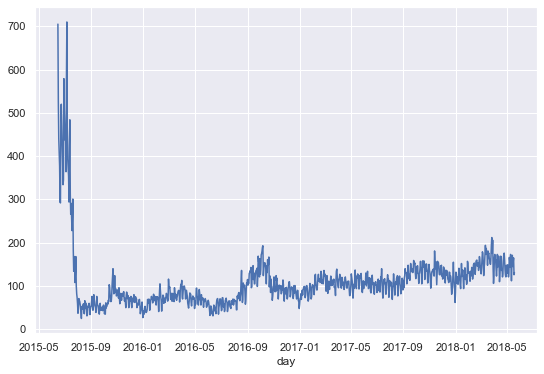

In [ ]:
events_data.groupby('day')\
    .user_id.nunique().plot()

<AxesSubplot:xlabel='day'>

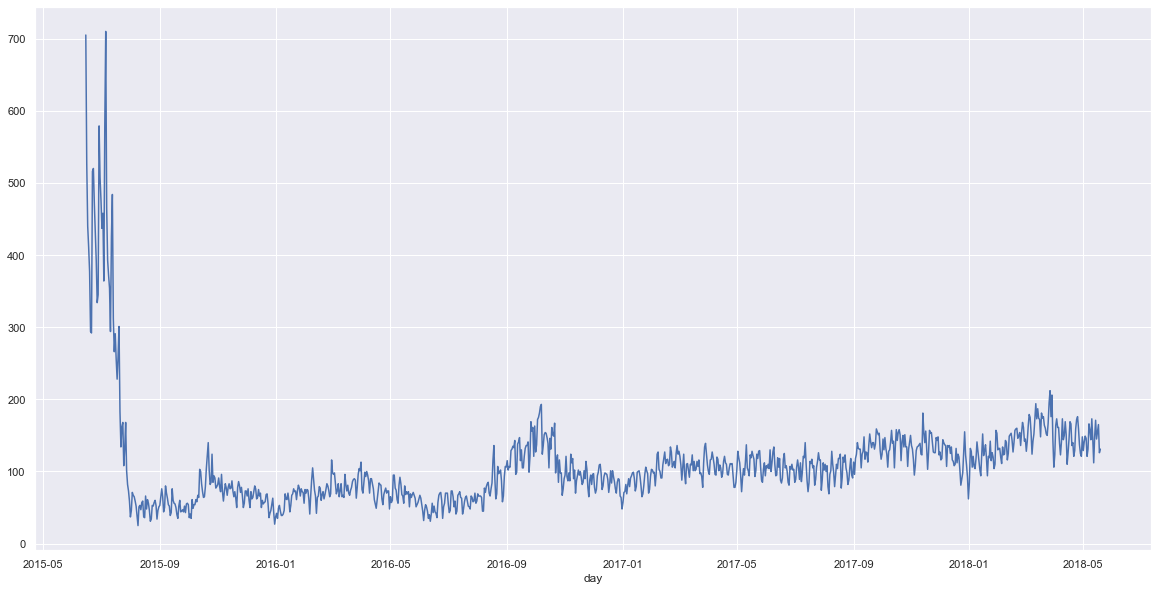

In [ ]:
events_data.groupby('day').user_id.nunique().plot(figsize=(20,10))

In [ ]:
#теряем пользователей, которые не прошедших стэп
events_data[events_data.action=='passed']\
    .groupby('user_id',as_index=False)\
    .agg({'step_id':'count'}).head()

,user_id,step_id
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


In [ ]:
#теряем пользователей, которые не прошедших стэп
events_data[events_data.action=='passed']\
    .groupby('user_id',as_index=False)\
    .agg({'step_id':'count'})\
    .rename(columns={'step_id':'passed_steps'}).head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


<AxesSubplot:>

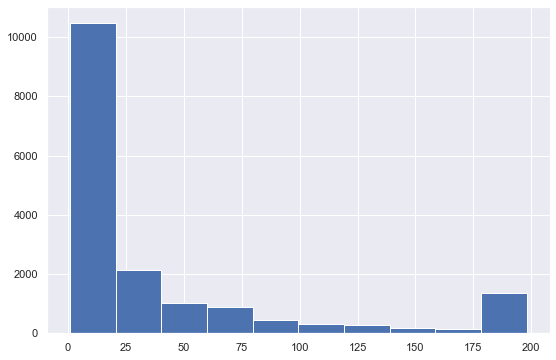

In [ ]:
events_data[events_data.action=='passed']\
    .groupby('user_id',as_index=False)\
    .agg({'step_id':'count'})\
    .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [ ]:
#Ради любопытства решил проверить, а какое количество пользователей мы все же потеряли)
#Посчитал кол-во уникальных пользователей в изначальной выборке:
events_data.user_id.nunique()

19234

In [ ]:
#Посчитал кол-во уникальных пользователей, которые прошли хотя-бы 1 степ:
events_data[events_data.action == 'passed'] \
          .groupby('user_id', as_index=False) \
          .agg({'step_id':'count'}) \
          .rename(columns={'step_id':'passed_steps'}).user_id.nunique()

17262

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [ ]:
# Буз потери данных
events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',
                       fill_value=0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [ ]:
# Сброс индека
events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',
                       fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<AxesSubplot:>

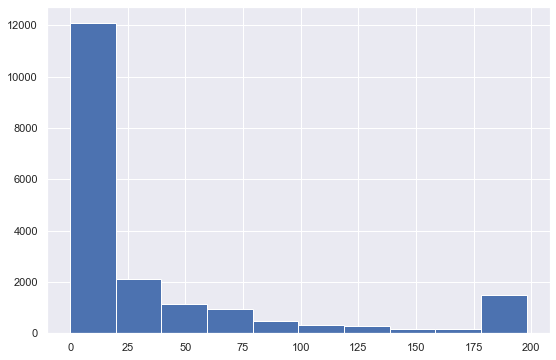

In [ ]:
events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',
                       fill_value=0).reset_index().discovered.hist()

In [ ]:
users_events_data=events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',
                       fill_value=0).reset_index()

In [ ]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [ ]:
users_events_data.passed.max()

198

In [ ]:
! gdown --   14p1Xy8HBacu0D3MuM7Bx2Tp2aCwjXBtb

Downloading...
From: https://drive.google.com/uc?id=14p1Xy8HBacu0D3MuM7Bx2Tp2aCwjXBtb
To: /content/submissions_data_train.zip
100% 2.79M/2.79M [00:00<00:00, 27.2MB/s]


In [ ]:
! unzip /content/submissions_data_train.zip

Archive:  /content/submissions_data_train.zip
  inflating: submissions_data_train.csv  


In [ ]:
submissions_data = pd.read_csv('/content/submissions_data_train.csv')

In [ ]:
# Для локальной загрузки
submissions_data = pd.read_csv('D:/DS/datafiles/submissions_data_train.zip', compression ='zip')

In [ ]:
submissions_data.head(10)

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
5,31976,1434348188,correct,15853
6,31976,1478852055,correct,15853
7,31977,1434347371,correct,15853
8,31978,1434349981,correct,15853
9,31979,1434446091,correct,15853


In [ ]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day']=submissions_data.date.dt.date

In [ ]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [ ]:
users_scores=submissions_data.pivot_table(index='user_id',columns='submission_status',values='step_id',aggfunc='count',
                       fill_value=0).reset_index()

In [ ]:
# users_scores=submissions_data.pivot_table
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [ ]:
# Для каждого пользователяя сохраним уникальные дни, когда он был онлайн на курсе
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
     .groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [ ]:
# Посчитаем разницу между ближайшими таймстемпами для пользователя
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
     .groupby('user_id')['timestamp'].apply(list)\
     .apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [ ]:
# Посчитаем значения разницы между ближайшими таймстемпами для пользователя
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
     .groupby('user_id')['timestamp'].apply(list)\
     .apply(np.diff).values

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int32)], dtype=object)

In [ ]:
gap_data=events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
     .groupby('user_id')['timestamp'].apply(list)\
     .apply(np.diff).values

In [ ]:
#Переведем в один массив
np.concatenate(gap_data,axis=0)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [ ]:
gap_data=pd.Series(np.concatenate(gap_data,axis=0))

In [ ]:
# Значения разницы между двумя ближайшими заходами на курс
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [ ]:
# Разница в днях, которые наблюдались у пользователя между заходами на курс
#делим на (206060) что бы из таймстемпов подучить значения в днях
gap_data=gap_data/(24*60*60)

In [ ]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<AxesSubplot:>

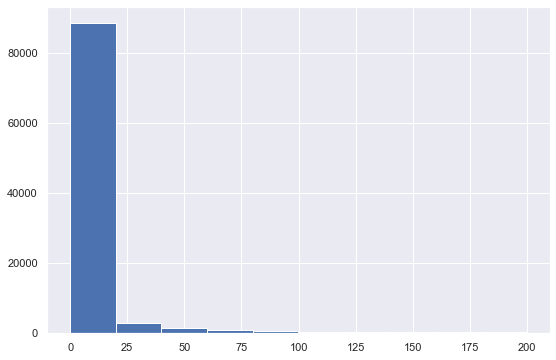

In [ ]:
gap_data[gap_data<200].hist()

In [ ]:
# 5% пользователей возвращается на курс после перерыва 59 дней
gap_data.quantile(0.95)

59.760440972222156

In [ ]:
gap_data.quantile(0.9)

18.325995370370403

In [ ]:
#пользователь, который провел на курсе больше всего дней (для этого решения нужна предобработка данных из следующих степов)
events_data.groupby('user_id')['day'].nunique().idxmax()

1046

In [ ]:
# Максимальное число дней на платформе
events_data.groupby('user_id')['day'].nunique().max()

478

In [ ]:
# Max timestamp user's
events_data.groupby('user_id' , as_index=False) \
    .aggregate({'timestamp' : 'max'}).tail()

,user_id,timestamp
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096
19233,26798,1520978742


In [ ]:
users_data = events_data.groupby('user_id' , as_index=False) \
    .aggregate({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [ ]:
users_data.tail()

,user_id,last_timestamp
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096
19233,26798,1520978742


In [ ]:
# now is last timestamp user's
now = 1526772811
drop_out_treshold = 30 * 24 * 60 * 60

In [ ]:
drop_out_treshold

2592000

In [ ]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [ ]:
# Если разница между последним текущим временем и последним временем юзера больше порога(месяц), то он считается ушедшим
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_treshold

In [ ]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [ ]:
users_data = users_data.merge(users_scores , how='outer')

In [ ]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [ ]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [ ]:
users_data = users_data.fillna(0)

In [ ]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [ ]:
users_events_data.passed.max()

198

In [ ]:
users_data = users_data.merge(users_events_data , how='outer')

In [ ]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [ ]:
users_data.passed.max()

198

In [ ]:
# Число уникальных дней каждого пользователя
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [ ]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [ ]:
users_data = users_data.merge(users_days , how='outer')

In [ ]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [ ]:
users_data.passed.max()

198

In [ ]:
# Проверяем число уникальных юзеров(есть ли потери)
users_data.user_id.nunique()

19234

In [ ]:
events_data.user_id.nunique()

19234

In [ ]:
users_data['passed_course'] = users_data.passed > 170

In [ ]:
users_data.tail()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False
19233,26798,1520978742,True,2.0,1.0,12,12,3,12,1,False


In [ ]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [ ]:
users_data.passed.max()

198

In [ ]:
# Сохраниение промежуточных данных в файл
users_data.to_csv('users_data.csv', encoding='utf-8', index=False)

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [ ]:
user_min_time=events_data.groupby('user_id',as_index=False)\
    .agg({'timestamp':'min'})\
    .rename({'timestamp':'min_timestamp'},axis=1)

In [ ]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [ ]:
users_data=users_data.merge(user_min_time, how='outer')

In [ ]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [ ]:
events_data_train=pd.DataFrame()

In [ ]:
# Создадим новый df куда отберем для каждого юзера события только за 3 первых дня
events_data = events_data.merge(user_min_time, how = 'outer')
events_data_train = events_data.query("timestamp <= min_timestamp + 3 * 24 * 60* 60")

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [ ]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [ ]:
events_data_train.shape

(1014985, 7)

In [ ]:
events_data.shape

(3480703, 7)

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [ ]:
# min+3days=user_time in 'events_data' (different ways of that)
events_data_train=events_data_train.rename({'timestamp':'min+3days'},axis=1)

In [ ]:
events_data_train.head()

,step_id,min+3days,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [ ]:
learning_time_treshold=3*24*60*60
learning_time_treshold

259200

In [ ]:
user_min_time['user_learning_time_treshold']=user_min_time.min_timestamp+learning_time_treshold

In [ ]:
user_min_time.head()

,user_id,min_timestamp,user_learning_time_treshold
0,1,1472827464,1473086664
1,2,1514383364,1514642564
2,3,1434358476,1434617676
3,5,1466156809,1466416009
4,7,1521634660,1521893860


In [ ]:
events_data = events_data.merge(user_min_time[['user_id','user_learning_time_treshold']],how='outer')

In [ ]:
events_data.shape

(3480703, 8)

In [ ]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,min_timestamp,user_learning_time_treshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848,1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848,1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848,1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848,1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848,1434600048


In [ ]:
events_data_train.head()

,step_id,min+3days,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [ ]:
events_data_train.shape

(1014985, 7)

In [ ]:
# Проверим максимальное число дней для каждого пользователя
events_data_train.groupby('user_id')['day'].nunique().max()

4

In [ ]:
user_min_time.head()

,user_id,min_timestamp,user_learning_time_treshold
0,1,1472827464,1473086664
1,2,1514383364,1514642564
2,3,1434358476,1434617676
3,5,1466156809,1466416009
4,7,1521634660,1521893860


In [ ]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [ ]:
submissions_data = submissions_data.merge(user_min_time, how='left')

In [ ]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp,user_learning_time_treshold
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1434345977,1434605177
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1434345977,1434605177
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11,1434345977,1434605177
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11,1434345977,1434605177
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434345977,1434605177


In [ ]:
submissions_data.shape

(509104, 8)

In [ ]:
submissions_data_train = submissions_data.query("timestamp <= min_timestamp + 3 * 24 * 60* 60")

In [ ]:
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp,user_learning_time_treshold
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1434345977,1434605177
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1434345977,1434605177
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434345977,1434605177
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15,1434345977,1434605177
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15,1434345977,1434605177


In [ ]:
submissions_data_train.shape

(135599, 8)

In [ ]:
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [ ]:
X=submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()

In [ ]:
X.head()

,user_id,day
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3


In [ ]:
steps_tried=submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index()\
    .rename(columns={'step_id':'steps_tried'})

In [ ]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23


In [ ]:
X.shape

(8913, 2)

In [ ]:
steps_tried.shape

(8913, 2)

In [ ]:
X=X.merge(steps_tried,on='user_id',how='outer')

In [ ]:
X.head()

,user_id,day,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [ ]:
submissions_data.pivot_table(index='user_id',columns='submission_status',values='step_id',aggfunc='count',
                       fill_value=0).reset_index().head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [ ]:
X=X.merge(submissions_data.pivot_table(index='user_id',columns='submission_status',values='step_id',aggfunc='count',\
                       fill_value=0).reset_index())

In [ ]:
X.head()

,user_id,day,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,29,23
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,77,106


In [ ]:
X['correct ratio']=X.correct/(X.correct+X.wrong)

In [ ]:
X.head()

,user_id,day,steps_tried,correct,wrong,correct ratio
0,2,1,2,2,0,1.000000
1,3,1,4,29,23,0.557692
2,8,1,11,9,21,0.300000
3,14,1,1,0,1,0.000000
4,16,3,23,77,106,0.420765


In [ ]:
X.shape

(8913, 6)

In [ ]:
X=X.merge(events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',\
                       fill_value=0).reset_index()[['user_id','viewed']],how='outer')

In [ ]:
X.shape

(19234, 7)

In [ ]:
X=X.fillna(0)

In [ ]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [ ]:
X=X.merge(users_data[['user_id','passed_course','is_gone_user']],how='outer')

In [ ]:
X.head()

,user_id,day,steps_tried,correct,wrong,correct ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.000000,10,False,True
1,3,1.0,4.0,29.0,23.0,0.557692,192,False,True
2,8,1.0,11.0,9.0,21.0,0.300000,156,False,True
3,14,1.0,1.0,0.0,1.0,0.000000,9,False,True
4,16,3.0,23.0,77.0,106.0,0.420765,651,True,True


In [ ]:
# Эквивалентно X.is_gone_user | X.passed_course
X=X[-((X.is_gone_user==False) & (X.passed_course==False))]

In [ ]:
X.head()

,user_id,day,steps_tried,correct,wrong,correct ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.000000,10,False,True
1,3,1.0,4.0,29.0,23.0,0.557692,192,False,True
2,8,1.0,11.0,9.0,21.0,0.300000,156,False,True
3,14,1.0,1.0,0.0,1.0,0.000000,9,False,True
4,16,3.0,23.0,77.0,106.0,0.420765,651,True,True


In [ ]:
X.groupby(['passed_course','is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [ ]:
X.groupby(['passed_course','is_gone_user'])['user_id'].count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [ ]:
y=X.passed_course

In [ ]:
X=X.drop(['passed_course','is_gone_user'],axis=1)

In [ ]:
X.head()

,user_id,day,steps_tried,correct,wrong,correct ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.000000,10
1,3,1.0,4.0,29.0,23.0,0.557692,192
2,8,1.0,11.0,9.0,21.0,0.300000,156
3,14,1.0,1.0,0.0,1.0,0.000000,9
4,16,3.0,23.0,77.0,106.0,0.420765,651


In [ ]:
X=X.set_index(X.user_id)
X=X.drop('user_id',axis=1)
X.head()

,day,steps_tried,correct,wrong,correct ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.000000,10
3,1.0,4.0,29.0,23.0,0.557692,192
8,1.0,11.0,9.0,21.0,0.300000,156
14,1.0,1.0,0.0,1.0,0.000000,9
16,3.0,23.0,77.0,106.0,0.420765,651


In [ ]:
y

0        False
1        False
2        False
3        False
4         True
         ...  
19229    False
19230     True
19231    False
19232    False
19233    False
Name: passed_course, Length: 17985, dtype: bool

In [ ]:
y=y.astype(int)

In [ ]:
y

0        0
1        0
2        0
3        0
4        1
        ..
19229    0
19230    1
19231    0
19232    0
19233    0
Name: passed_course, Length: 17985, dtype: int32

In [ ]:
X.to_csv('X.csv', encoding='utf-8', index=False)

In [ ]:
y.to_csv('y.csv', encoding='utf-8', index=False)

In [ ]:
X=pd.read_csv('C:/Users/79533/Desktop/DS/Pyfiles/X.csv')

In [ ]:
y=pd.read_csv('C:/Users/79533/Desktop/DS/Pyfiles/y.csv')

In [ ]:
X.head()

,day,steps_tried,correct,wrong,correct ratio,viewed
0,1.0,2.0,2.0,0.0,1.000000,10
1,1.0,4.0,29.0,23.0,0.557692,192
2,1.0,11.0,9.0,21.0,0.300000,156
3,1.0,1.0,0.0,1.0,0.000000,9
4,3.0,23.0,77.0,106.0,0.420765,651


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

clf = LogisticRegressionCV(cv=5)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
print(clf.coef_)
print(clf.intercept_)
print(cross_val_score(clf,X_train,y_train,cv=4).mean())

C:\Users\79533\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\79533\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\79533\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

0.9849874895746455
[[-5.34835510e-01  1.28367792e-02  1.36048752e-01 -1.14830862e-02
  -4.98288356e+00  2.90325112e-03]]
[-4.80972252]


C:\Users\79533\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\79533\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\79533\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.983041423408396


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

dt = DecisionTreeClassifier(criterion='entropy')
parameters = {'max_depth': range(3,6), 'max_leaf_nodes':range(6,15), 'min_samples_leaf': range(1,4),'min_samples_split':range(2,5)}
grid_search_cv_clf = GridSearchCV(dt,parameters,cv=4)
grid_search_cv_clf.fit(X_train,y_train)

model = grid_search_cv_clf.best_estimator_
print(grid_search_cv_clf.best_params_, cross_val_score(model,X_train,y_train,cv=4).mean())

{'max_depth': 5, 'max_leaf_nodes': 12, 'min_samples_leaf': 2, 'min_samples_split': 3} 0.9905476786210732


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

knn = KNeighborsClassifier()
parameters = {'n_neighbors': range(15,25), 'leaf_size':range(1,7)}
grid_search_cv_clf = GridSearchCV(knn,parameters,cv=4,n_jobs=-1)
grid_search_cv_clf.fit(X_train,y_train)

model = grid_search_cv_clf.best_estimator_
print(grid_search_cv_clf.best_params_, cross_val_score(model,X_train,y_train,cv=4).mean())

C:\Users\79533\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\79533\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\79533\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\79533\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

{'leaf_size': 2, 'n_neighbors': 16} 0.9831804281345566
